# Homework : 3 Machine Learning - 1 (Supervised Methods)

## 4. Code up a 2-class perceptron learning algorithm and classifier.

### Importing Necessary Libraries

In [1]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

#Importing the nearestMeansClassifier library from utils package.
from utils import  perceptron

### Loading the Training Data and Testing Data from dataset-1 using Pandas

In [2]:
train_data_1 = pd.read_csv("./HW3_datasets/dataset1_train.csv", header=None)
print("Train Data -> 1: ")
print(train_data_1.head())
print()

test_data_1 = pd.read_csv("./HW3_datasets/dataset1_test.csv", header=None)
print("Test Data -> 1: ")
print(test_data_1.head())

Train Data -> 1: 
          0         1    2
0  2.199291  3.690399  1.0
1  0.472634 -0.709271  2.0
2 -0.026662 -1.335827  2.0
3 -0.116866 -1.336345  2.0
4  2.100909  1.143771  2.0

Test Data -> 1: 
          0         1    2
0  1.226845  0.273791  2.0
1 -0.929775  0.300098  1.0
2  0.220924  0.835073  1.0
3  0.783772 -0.233020  2.0
4  2.116507  0.728805  2.0


### Loading the Training Data and Testing Data from dataset-2 using Pandas

In [3]:
train_data_2 = pd.read_csv("./HW3_datasets/dataset2_train.csv", header=None)
print("Train Data -> 2: ")
print(train_data_2.head())
print()

test_data_2 = pd.read_csv("./HW3_datasets/dataset2_test.csv", header=None)
print("Train Data -> 2: ")
print(test_data_2.head())
print()

Train Data -> 2: 
          0         1    2
0  0.493655  0.905948  1.0
1  0.872053 -0.355721  2.0
2 -0.009021  0.132694  2.0
3 -0.578481  1.000596  1.0
4 -0.438395  1.038901  1.0

Train Data -> 2: 
          0         1    2
0 -0.070044 -0.118457  2.0
1 -0.824375  0.892066  1.0
2  1.384810  0.016317  2.0
3  0.304828  0.286498  2.0
4  1.651588  0.902572  1.0



### Loading the Training Data and Testing Data from dataset-3 using Pandas


In [4]:
train_data_3 = pd.read_csv("./HW3_datasets/dataset3_train.csv", header=None)
print("Train Data -> 3: ")
print(train_data_3.head())
print()

test_data_3 = pd.read_csv("./HW3_datasets/dataset3_test.csv", header=None)
print("Train Data -> 3: ")
print(test_data_3.head())

print()

Train Data -> 3: 
          0         1    2
0 -3.182181  1.966441  1.0
1  0.245498  1.287367  2.0
2  0.480500  0.785206  2.0
3  0.338015 -0.906211  1.0
4  0.396452  1.345380  2.0

Train Data -> 3: 
          0         1    2
0  0.624833  1.394105  2.0
1  2.976187 -0.119177  1.0
2  0.489271 -2.653542  1.0
3  0.159336  1.642712  2.0
4  0.059028  0.772479  2.0



## 4. (a) Perform the following for Dataset - 1 of Homework -> 1

### i] Run the perceptron learning algorithm to find optimum w_vector using Stochastic Gradient Descent Variant - 1.

In [5]:
perceptron_1 = perceptron.Perceptron()

In [6]:
n_train_1, X_train_1, T_train_1 = perceptron_1.generateTrainData(trainData=train_data_1)
X_train_augmented_1 = perceptron_1.augmentData(X=X_train_1, n=n_train_1)
print(f"Shape of Augmented X_train_1: {X_train_augmented_1.shape}")

T_train_changed_1 = perceptron_1.changeLabels(T = T_train_1)

X_train_shuffled_1, T_train_shuffled_1 = perceptron_1.shuffleData(X=X_train_augmented_1, T=T_train_changed_1.reshape(n_train_1, 1))

w_vector_1 = perceptron_1.initializeWeights(0.1)

---------------------------------------------------
  Shape of Input Data: (100, 3)
  Number of Data Points: 100
  Number of Input Features: 2
  Number of Target Classes: 2
---------------------------------------------------
Shape of Augmented X_train_1: (100, 3)


In [7]:
convergenceFlag_1, n_epochs_1, n_epochs_arr_1, n_iters_1, n_iters_arr_1, J_History_epochs_1, w_History_epochs_1, J_History_iterations_1, cer_History_epochs_1, cer_History_iterations_1 = perceptron_1.modelTrain_Stochastic_GD_Variant1(
                                                                                                                                                                n_train = n_train_1, 
                                                                                                                                                                X_train=X_train_shuffled_1, 
                                                                                                                                                                T_train=T_train_shuffled_1, 
                                                                                                                                                                w_vector=w_vector_1, 
                                                                                                                                                                epochs=100, 
                                                                                                                                                                learn_rate=1)

Epoch #1 -> Cost J(W) is: 1.944969512031248 and CER using w_vector at the end of N iterations is 3.0
Epoch #2 -> Cost J(W) is: 0 and CER using w_vector at the end of N iterations is 0.0


### i] Give the resulting optimum w vector; state whether the algorithm converged (i.1 reached) or halted without convergence (i.2 reached); and give the final criterion function value J(w_optimum)

In [8]:
optimum_index_epochs_1 = np.argmin(J_History_epochs_1)
optimum_index_iterations_1 = np.argmin(cer_History_iterations_1)

w_optimum_epochs_1 = w_History_epochs_1[optimum_index_epochs_1]
J_optimum_epochs_1 = J_History_epochs_1[optimum_index_epochs_1]
J_optimum_iterations_1 = J_History_iterations_1[optimum_index_iterations_1]
cer_optimum_epochs_1 = cer_History_epochs_1[optimum_index_epochs_1]
cer_optimum_iterations_1 = cer_History_iterations_1[optimum_index_iterations_1]

In [9]:
if convergenceFlag_1:
    print(f"The Perceptron Learning Algorithm got converged after {n_iters_1} iterations and {n_epochs_1} epoch(s) for Training set of Dataset - 1!")
    print("DATASET - 1 IS LINEARLY SEPARABLE!!")
else:
    print(f"The Perceptron Learning Algorithm did not converge for Training set of Dataset - 1 and it took {n_iters_1} iterations and {n_epochs_1} epoch(s)!")

print(f"The optimum value of w_vector for Training Set of Dataset - 1 is: {w_optimum_epochs_1}")
print(f"The Final Criterion function value for optimum value of w is: {J_optimum_epochs_1}")

The Perceptron Learning Algorithm got converged after 141 iterations and 2 epoch(s) for Training set of Dataset - 1!
DATASET - 1 IS LINEARLY SEPARABLE!!
The optimum value of w_vector for Training Set of Dataset - 1 is: [[-0.9       ]
 [-5.10135108]
 [ 6.1276166 ]]
The Final Criterion function value for optimum value of w is: 0


### ii] Produce a learning curve, which is a plot of the values of the criterion function during the training process. If the training goes for more than 10 epochs, plot the criterion function vs. epochs. If training ends before 10 epochs, plot the criterion function vs. iterations.

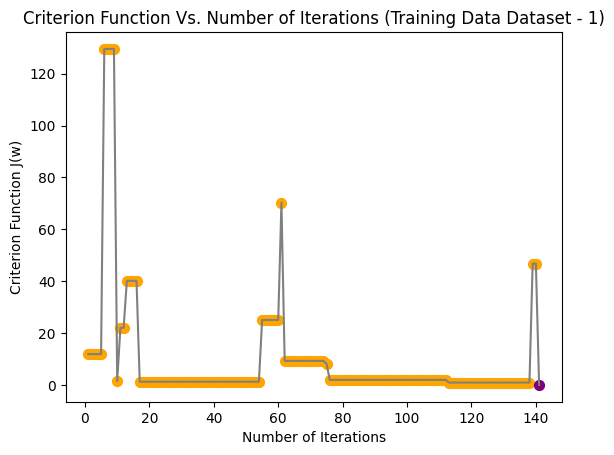

In [10]:
if n_epochs_1 <= 10:
    perceptron_1.plotCriterionVsIters(n_iters=n_iters_arr_1, J_History_iters=J_History_iterations_1, J_optimum_iters=J_optimum_iterations_1, datasetName="Training Data Dataset - 1")

else:
    perceptron_1.plotCriterionVsEpochs(n_epochs=n_epochs_arr_1, J_History_epochs=J_History_epochs_1, J_optimum_epochs=J_optimum_epochs_1, datasetName="Training Data Dataset - 1")

### ii] Plot of Classification Error Rate (CER) Vs. Number of Epochs (or) Plot of Classification Error Rate (CER) Vs. Number of Iterations

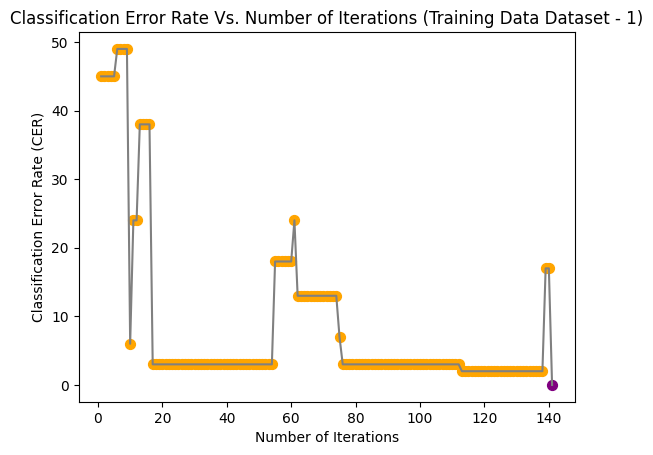

In [11]:
if n_epochs_1 <= 10:
    perceptron_1.plotCERVsIters(n_iters=n_iters_arr_1, cer_History_iters=cer_History_iterations_1, cer_optimum_iters=cer_optimum_iterations_1, datasetName="Training Data Dataset - 1")

else:
    perceptron_1.plotCriterionVsEpochs(n_epochs=n_epochs_arr_1, cer_History_epochs=cer_History_epochs_1, cer_optimum_epochs=cer_optimum_epochs_1, datasetName="Training Data Dataset - 1")

### iii] Run the perceptron classifier on the training set using the optimum w_vector . Give the classification error of each.

In [12]:
Y_hat_training_1 = perceptron_1.predict(X=X_train_augmented_1, w_optimum=w_optimum_epochs_1)
cer_training_1 = perceptron_1.calculateCER(T=T_train_changed_1, Y_hat=Y_hat_training_1, n=n_train_1)
print(f"Classification Error Rate (CER) on the training data of Dataset - 1 is: {cer_training_1}")

Classification Error Rate (CER) on the training data of Dataset - 1 is: 0.0


### iii] Run the perceptron classifier on the test set using the optimum w_vector . Give the classification error of each.

In [13]:
n_test_1, X_test_1, T_test_1 = perceptron_1.generateTestData(test_data=test_data_1)

X_test_augmented_1 = perceptron_1.augmentData(X=X_test_1, n=n_test_1)
print(f"Shape of Augmented X_test_1: {X_test_augmented_1.shape}")

T_test_changed_1 = perceptron_1.changeLabels(T = T_test_1)


Shape of Augmented X_test_1: (100, 3)


In [14]:
Y_hat_test_1 = perceptron_1.predict(X=X_test_augmented_1, w_optimum=w_optimum_epochs_1)
cer_test_1 = perceptron_1.calculateCER(T=T_test_changed_1, Y_hat=Y_hat_test_1, n=n_test_1)
print(f"Classification Error Rate (CER) on the test data of Dataset - 1 is: {cer_test_1}")

Classification Error Rate (CER) on the test data of Dataset - 1 is: 0.0


### Plot in feature space the training data points, decision boundaries, and decision regions. The decision boundaries and regions should use the final optimum w_vector.

/Users/sk/ee559-mlOne/HW-3/utils/perceptron.py:714: UserWarning: The following kwargs were not used by contour: 'c'
  ax.contour(x, y, z, [0], c="purple")


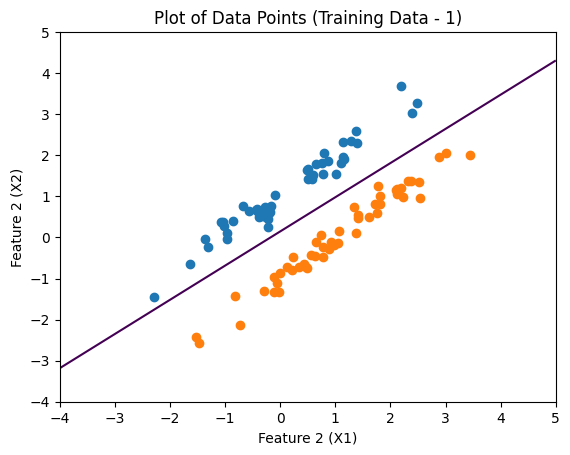

In [15]:
perceptron_1.plotDecisionBoundary(np.hstack((X_train_1, T_train_changed_1.reshape(n_train_1, 1))), w_vector=w_optimum_epochs_1, datasetName="Training Data - 1")

## 4. (b) Perform the following for Dataset - 2 of Homework -> 2


### i] Run the perceptron learning algorithm to find optimum w_vector using Stochastic Gradient Descent Variant - 1.


In [16]:
perceptron_2 = perceptron.Perceptron()


In [17]:
n_train_2, X_train_2, T_train_2 = perceptron_2.generateTrainData(trainData=train_data_2)
X_train_augmented_2 = perceptron_2.augmentData(X=X_train_2, n=n_train_2)
print(f"Shape of Augmented X_train_2: {X_train_augmented_1.shape}")

T_train_changed_2 = perceptron_2.changeLabels(T = T_train_2)

X_train_shuffled_2, T_train_shuffled_2 = perceptron_2.shuffleData(X=X_train_augmented_2, T=T_train_changed_2.reshape(n_train_2, 1))

w_vector_2 = perceptron_2.initializeWeights(0.1)

---------------------------------------------------
  Shape of Input Data: (100, 3)
  Number of Data Points: 100
  Number of Input Features: 2
  Number of Target Classes: 2
---------------------------------------------------
Shape of Augmented X_train_2: (100, 3)


In [18]:
convergenceFlag_2, n_epochs_2, n_epochs_arr_2, n_iters_2, n_iters_arr_2, J_History_epochs_2, w_History_epochs_2, J_History_iterations_2, cer_History_epochs_2, cer_History_iterations_2 = perceptron_2.modelTrain_Stochastic_GD_Variant1(
                                                                                                                                                                n_train = n_train_2, 
                                                                                                                                                                X_train=X_train_shuffled_2, 
                                                                                                                                                                T_train=T_train_shuffled_2, 
                                                                                                                                                                w_vector=w_vector_2, 
                                                                                                                                                                epochs=100, 
                                                                                                                                                                learn_rate=1)

Epoch #1 -> Cost J(W) is: 0 and CER using w_vector at the end of N iterations is 0.0


### i] Give the resulting optimum w vector; state whether the algorithm converged (i.1 reached) or halted without convergence (i.2 reached); and give the final criterion function value J(w_optimum)


In [19]:
optimum_index_epochs_2 = np.argmin(J_History_epochs_2)
optimum_index_iterations_2 = np.argmin(cer_History_iterations_2)

w_optimum_epochs_2 = w_History_epochs_2[optimum_index_epochs_2]
J_optimum_epochs_2 = J_History_epochs_2[optimum_index_epochs_2]
J_optimum_iterations_2 = J_History_iterations_2[optimum_index_iterations_2]
cer_optimum_epochs_2 = cer_History_epochs_2[optimum_index_epochs_2]
cer_optimum_iterations_2 = cer_History_iterations_2[optimum_index_iterations_2]

In [20]:
if convergenceFlag_2:
    print(f"The Perceptron Learning Algorithm got converged after {n_iters_2} iterations and {n_epochs_2} epoch(s) for Training set of Dataset - 2!")
    print("DATASET - 2 IS LINEARLY SEPARABLE!!")
else:
    print(f"The Perceptron Learning Algorithm did not converge for Training set of Dataset - 2 and it took {n_iters_2} iterations and {n_epochs_2} epoch(s)!")

print(f"The optimum value of w_vector for Training Set of Dataset - 2 is: {w_optimum_epochs_2}")
print(f"The Final Criterion function value for optimum value of w is: {J_optimum_epochs_2}")

The Perceptron Learning Algorithm got converged after 40 iterations and 1 epoch(s) for Training set of Dataset - 2!
DATASET - 2 IS LINEARLY SEPARABLE!!
The optimum value of w_vector for Training Set of Dataset - 2 is: [[-0.9       ]
 [-0.42632156]
 [ 3.12768478]]
The Final Criterion function value for optimum value of w is: 0


### ii] Produce a learning curve, which is a plot of the values of the criterion function during the training process. If the training goes for more than 10 epochs, plot the criterion function vs. epochs. If training ends before 10 epochs, plot the criterion function vs. iterations.

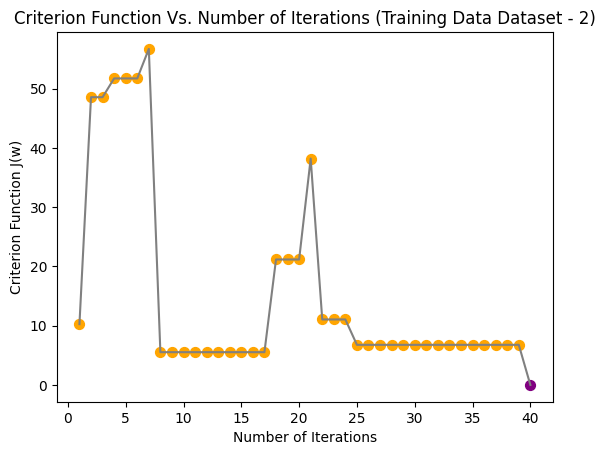

In [21]:
if n_epochs_2 <= 10:
    perceptron_2.plotCriterionVsIters(n_iters=n_iters_arr_2, J_History_iters=J_History_iterations_2, J_optimum_iters=J_optimum_iterations_2, datasetName="Training Data Dataset - 2")

else:
    perceptron_2.plotCriterionVsEpochs(n_epochs=n_epochs_arr_2, J_History_epochs=J_History_epochs_2, J_optimum_epochs=J_optimum_epochs_2, datasetName="Training Data Dataset - 2")

### ii] Plot of Classification Error Rate (CER) Vs. Number of Epochs (or) Plot of Classification Error Rate (CER) Vs. Number of Iterations


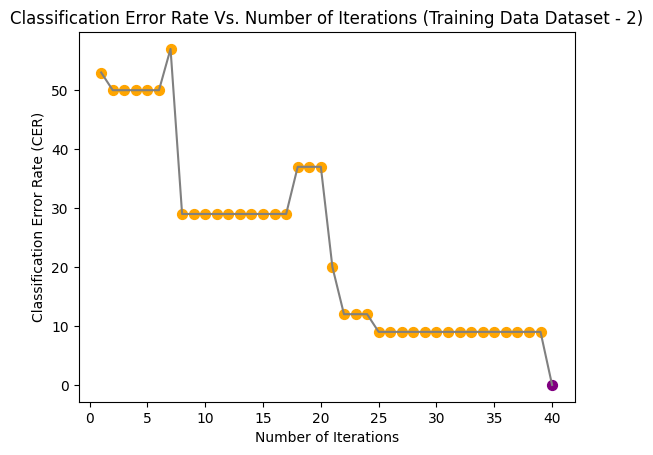

In [22]:
if n_epochs_2 <= 10:
    perceptron_2.plotCERVsIters(n_iters=n_iters_arr_2, cer_History_iters=cer_History_iterations_2, cer_optimum_iters=cer_optimum_iterations_2, datasetName="Training Data Dataset - 2")

else:
    perceptron_2.plotCriterionVsEpochs(n_epochs=n_epochs_arr_2, cer_History_epochs=cer_History_epochs_2, cer_optimum_epochs=cer_optimum_epochs_2, datasetName="Training Data Dataset - 2")

### iii] Run the perceptron classifier on the training set using the optimum w_vector . Give the classification error of each.

In [23]:
Y_hat_training_2 = perceptron_2.predict(X=X_train_augmented_2, w_optimum=w_optimum_epochs_2)
cer_training_2 = perceptron_2.calculateCER(T=T_train_changed_2, Y_hat=Y_hat_training_2, n=n_train_2)
print(f"Classification Error Rate (CER) on the training data of Dataset - 2 is: {cer_training_2}")

Classification Error Rate (CER) on the training data of Dataset - 2 is: 0.0


### iii] Run the perceptron classifier on the test set using the optimum w_vector . Give the classification error of each.


In [24]:
n_test_2, X_test_2, T_test_2 = perceptron_2.generateTestData(test_data=test_data_2)

X_test_augmented_2 = perceptron_2.augmentData(X=X_test_2, n=n_test_2)
print(f"Shape of Augmented X_test_2: {X_test_augmented_2.shape}")

T_test_changed_2 = perceptron_2.changeLabels(T = T_test_2)

Shape of Augmented X_test_2: (100, 3)


In [25]:
Y_hat_test_2 = perceptron_2.predict(X=X_test_augmented_2, w_optimum=w_optimum_epochs_2)
cer_test_2 = perceptron_2.calculateCER(T=T_test_changed_2, Y_hat=Y_hat_test_2, n=n_test_2)
print(f"Classification Error Rate (CER) on the test data of Dataset - 2 is: {cer_test_2}")

Classification Error Rate (CER) on the test data of Dataset - 2 is: 2.0


### iv] Plot in feature space the training data points, decision boundaries, and decision regions. The decision boundaries and regions should use the final optimum x_vector.

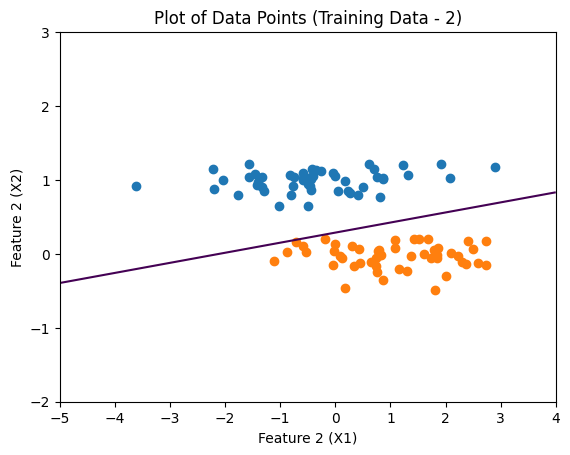

In [26]:
perceptron_2.plotDecisionBoundary(np.hstack((X_train_2, T_train_changed_2.reshape(n_train_2, 1))), w_vector=w_optimum_epochs_2, datasetName="Training Data - 2")

## 4. (c) Perform the following for Dataset - 3 of Homework -> 3


### i] Run the perceptron learning algorithm to find optimum w_vector using Stochastic Gradient Descent Variant - 1.


In [27]:
perceptron_3 = perceptron.Perceptron()

In [28]:
n_train_3, X_train_3, T_train_3 = perceptron_3.generateTrainData(trainData=train_data_3)
X_train_augmented_3 = perceptron_3.augmentData(X=X_train_3, n=n_train_3)
print(f"Shape of Augmented X_train_3: {X_train_augmented_3.shape}")

T_train_changed_3 = perceptron_3.changeLabels(T = T_train_3)

X_train_shuffled_3, T_train_shuffled_3 = perceptron_3.shuffleData(X=X_train_augmented_3, T=T_train_changed_3.reshape(n_train_3, 1))

w_vector_3 = perceptron_3.initializeWeights(0.1)

---------------------------------------------------
  Shape of Input Data: (100, 3)
  Number of Data Points: 100
  Number of Input Features: 2
  Number of Target Classes: 2
---------------------------------------------------
Shape of Augmented X_train_3: (100, 3)


In [29]:
convergenceFlag_3, n_epochs_3, n_epochs_arr_3, n_iters_3, n_iters_arr_3, J_History_epochs_3, w_History_epochs_3, J_History_iterations_3, cer_History_epochs_3, cer_History_iterations_3 = perceptron_3.modelTrain_Stochastic_GD_Variant1(
                                                                                                                                                                n_train = n_train_3, 
                                                                                                                                                                X_train=X_train_shuffled_3, 
                                                                                                                                                                T_train=T_train_shuffled_3, 
                                                                                                                                                                w_vector=w_vector_3, 
                                                                                                                                                                epochs=100, 
                                                                                                                                                                learn_rate=1)

Epoch #1 -> Cost J(W) is: 257.7811183003706 and CER using w_vector at the end of N iterations is 71.0
Epoch #2 -> Cost J(W) is: 71.2328919779538 and CER using w_vector at the end of N iterations is 52.0
Epoch #3 -> Cost J(W) is: 36.80554739797168 and CER using w_vector at the end of N iterations is 34.0
Epoch #4 -> Cost J(W) is: 97.75570736831308 and CER using w_vector at the end of N iterations is 51.0
Epoch #5 -> Cost J(W) is: 59.60040056547452 and CER using w_vector at the end of N iterations is 27.0
Epoch #6 -> Cost J(W) is: 63.41110833484 and CER using w_vector at the end of N iterations is 57.99999999999999
Epoch #7 -> Cost J(W) is: 72.76749596875106 and CER using w_vector at the end of N iterations is 36.0
Epoch #8 -> Cost J(W) is: 83.64133415349367 and CER using w_vector at the end of N iterations is 24.0
Epoch #9 -> Cost J(W) is: 48.81781098631854 and CER using w_vector at the end of N iterations is 37.0
Epoch #10 -> Cost J(W) is: 71.32045171803344 and CER using w_vector at th

###

### i] Give the resulting optimum w vector; state whether the algorithm converged (i.1 reached) or halted without convergence (i.2 reached); and give the final criterion function value J(w_optimum)


In [30]:
optimum_index_epochs_3 = np.argmin(J_History_epochs_3)
optimum_index_iterations_3 = np.argmin(cer_History_iterations_3)

w_optimum_epochs_3 = w_History_epochs_3[optimum_index_epochs_3]
J_optimum_epochs_3 = J_History_epochs_3[optimum_index_epochs_3]
J_optimum_iterations_3 = J_History_iterations_3[optimum_index_iterations_3]
cer_optimum_epochs_3 = cer_History_epochs_3[optimum_index_epochs_3]
cer_optimum_iterations_3 = cer_History_iterations_3[optimum_index_iterations_3]

In [31]:
if convergenceFlag_3:
    print(f"The Perceptron Learning Algorithm got converged after {n_iters_3} iterations and {n_epochs_3} epoch(s) for Training set of Dataset - 3!")
    print("DATA IS LINEARLY SEPARABLE!!")
else:
    print(f"The Perceptron Learning Algorithm did not converge for Training set of Dataset - 3 and it took {n_iters_3} iterations and {n_epochs_3} epoch(s)")

print(f"The optimum value of w_vector for Training Set of Dataset - 3 is: {w_optimum_epochs_3}")
print(f"The Final Criterion function value for optimum value of w is: {J_optimum_epochs_3}")

The Perceptron Learning Algorithm did not converge for Training set of Dataset - 3 and it took 10000 iterations and 100 epoch(s)
The optimum value of w_vector for Training Set of Dataset - 3 is: [[ 0.1       ]
 [-0.26720288]
 [-0.03544646]]
The Final Criterion function value for optimum value of w is: 8.417422571491077


### ii] Produce a learning curve, which is a plot of the values of the criterion function during the training process. If the training goes for more than 10 epochs, plot the criterion function vs. epochs. If training ends before 10 epochs, plot the criterion function vs. iterations.

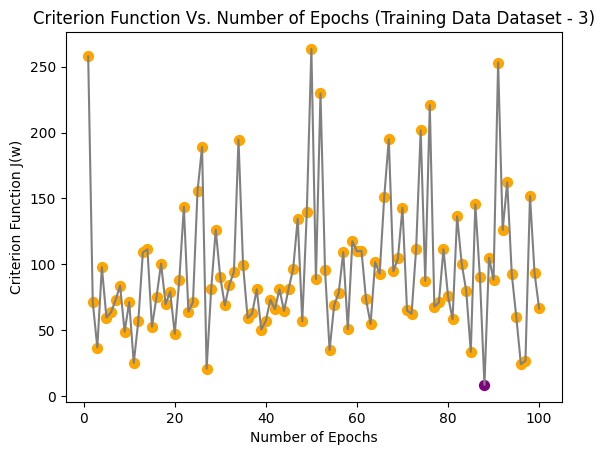

In [32]:
if n_epochs_3 <= 10:
    perceptron_3.plotCriterionVsIters(n_iters=n_iters_arr_3, J_History_iters=J_History_iterations_3, J_optimum_iters=J_optimum_iterations_3, datasetName="Training Data Dataset - 3")

else:
    perceptron_3.plotCriterionVsEpochs(n_epochs=n_epochs_arr_3, J_History_epochs=J_History_epochs_3, J_optimum_epochs=J_optimum_epochs_3, datasetName="Training Data Dataset - 3")

### ii] Plot of Classification Error Rate (CER) Vs. Number of Epochs (or) Plot of Classification Error Rate (CER) Vs. Number of Iterations

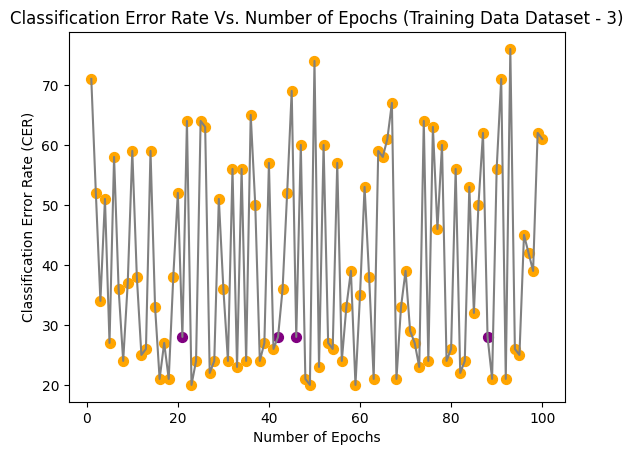

In [33]:
if n_epochs_3 <= 10:
    perceptron_3.plotCERVsIters(n_iters=n_iters_arr_3, cer_History_iters=cer_History_iterations_3, cer_optimum_iters=cer_optimum_iterations_3, datasetName="Training Data Dataset - 3")

else:
    perceptron_3.plotCERVsEpochs(n_epochs=n_epochs_arr_3, cer_History_epochs=cer_History_epochs_3, cer_optimum_epochs=cer_optimum_epochs_3, datasetName="Training Data Dataset - 3")


### iii] Run the perceptron classifier on the training set using the optimum w_vector . Give the classification error of each.

In [34]:
Y_hat_training_3 = perceptron_3.predict(X=X_train_augmented_3, w_optimum=w_optimum_epochs_3)
cer_training_3 = perceptron_3.calculateCER(T=T_train_changed_3, Y_hat=Y_hat_training_3, n=n_train_3)
print(f"Classification Error Rate (CER) on the training data of Dataset - 3 is: {cer_training_3}")

Classification Error Rate (CER) on the training data of Dataset - 3 is: 28.000000000000004


### iii] Run the perceptron classifier on the test set using the optimum w_vector . Give the classification error of each.


In [35]:
n_test_3, X_test_3, T_test_3 = perceptron_3.generateTestData(test_data=test_data_3)

X_test_augmented_3 = perceptron_3.augmentData(X=X_test_3, n=n_test_3)
print(f"Shape of Augmented X_test_3: {X_test_augmented_3.shape}")

T_test_changed_3 = perceptron_3.changeLabels(T = T_test_3)

Shape of Augmented X_test_3: (100, 3)


In [36]:
Y_hat_test_3 = perceptron_3.predict(X=X_test_augmented_3, w_optimum=w_optimum_epochs_3)
cer_test_3 = perceptron_3.calculateCER(T=T_test_changed_3, Y_hat=Y_hat_test_3, n=n_test_3)
print(f"Classification Error Rate (CER) on the test data of Dataset - 3 is: {cer_test_3}")

Classification Error Rate (CER) on the test data of Dataset - 3 is: 33.0


### iv] Plot in feature space the training data points, decision boundaries, and decision regions. The decision boundaries and regions should use the final optimum x_vector.

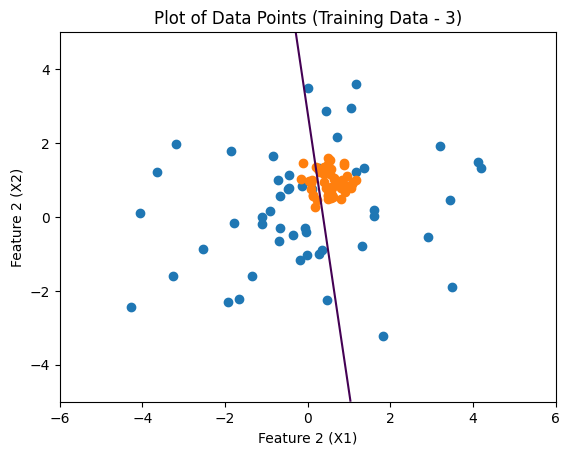

In [37]:
perceptron_3.plotDecisionBoundary(np.hstack((X_train_3, T_train_changed_3.reshape(n_train_3, 1))), w_vector=w_optimum_epochs_3, datasetName="Training Data - 3")

## (d) Breast Cancer Classification Problem using Sequential GD

### i] Run the perceptron learning algorithm to find optimum w_vector using Stochastic Gradient Descent Variant - 1.


In [38]:
train_data_bc = np.load("./HW3_Datasets/breast_cancer_train.npy")
test_data_bc = np.load("./HW3_Datasets/breast_cancer_test.npy")

train_data_bc.shape

(480, 31)

In [39]:
perceptron_bc = perceptron.Perceptron()

In [40]:
n_train_bc, X_train_bc, T_train_bc = perceptron_bc.generateTrainDataNumpy(trainData=train_data_bc)

X_train_L1_norms = np.linalg.norm(X_train_bc, ord=1, axis=0)

X_train_bc_normalized = 100 * X_train_bc / X_train_L1_norms

X_train_augmented_bc = perceptron_bc.augmentData(X=X_train_bc_normalized, n=n_train_bc)
print(f"Shape of Augmented X_train_bc: {X_train_augmented_bc.shape}")

T_train_changed_bc = perceptron_bc.changeLabels(T = T_train_bc)

X_train_shuffled_bc, T_train_shuffled_bc = perceptron_bc.shuffleData(X=X_train_augmented_bc, T=T_train_changed_bc.reshape(n_train_bc, 1))

w_vector_bc = perceptron_bc.initializeWeights(0.1)

---------------------------------------------------
  Shape of Input Data: (480, 31)
  Number of Data Points: 480
  Number of Input Features: 30
  Number of Target Classes: 2
---------------------------------------------------
Shape of Augmented X_train_bc: (480, 31)


In [41]:
convergenceFlag_bc, n_epochs_bc, n_epochs_arr_bc, n_iters_bc, n_iters_arr_bc, J_History_epochs_bc, w_History_epochs_bc, J_History_iterations_bc, cer_History_epochs_bc, cer_History_iterations_bc = perceptron_bc.modelTrain_Stochastic_GD_Variant1(
                                                                                                                                                                n_train = n_train_bc, 
                                                                                                                                                                X_train=X_train_shuffled_bc, 
                                                                                                                                                                T_train=T_train_shuffled_bc, 
                                                                                                                                                                w_vector=w_vector_bc, 
                                                                                                                                                                epochs=100, 
                                                                                                                                                                learn_rate=1)

Epoch #1 -> Cost J(W) is: 5.35498337394115 and CER using w_vector at the end of N iterations is 3.958333333333333
Epoch #2 -> Cost J(W) is: 5.7415707580726885 and CER using w_vector at the end of N iterations is 3.3333333333333335
Epoch #3 -> Cost J(W) is: 9.56014844657607 and CER using w_vector at the end of N iterations is 3.75
Epoch #4 -> Cost J(W) is: 12.528415825493013 and CER using w_vector at the end of N iterations is 3.75
Epoch #5 -> Cost J(W) is: 4.494246620909757 and CER using w_vector at the end of N iterations is 1.875
Epoch #6 -> Cost J(W) is: 7.2239546985901875 and CER using w_vector at the end of N iterations is 3.75
Epoch #7 -> Cost J(W) is: 56.163656813183536 and CER using w_vector at the end of N iterations is 13.125
Epoch #8 -> Cost J(W) is: 5.242028779502738 and CER using w_vector at the end of N iterations is 2.9166666666666665
Epoch #9 -> Cost J(W) is: 3.9381094241286903 and CER using w_vector at the end of N iterations is 1.875
Epoch #10 -> Cost J(W) is: 19.9790

### i] Give the resulting optimum w vector; state whether the algorithm converged (i.1 reached) or halted without convergence (i.2 reached); and give the final criterion function value J(w_optimum)

In [42]:
optimum_index_epochs_bc = np.argmin(J_History_epochs_bc)
optimum_index_iterations_bc = np.argmin(cer_History_iterations_bc)

w_optimum_epochs_bc = w_History_epochs_bc[optimum_index_epochs_bc]
J_optimum_epochs_bc = J_History_epochs_bc[optimum_index_epochs_bc]
J_optimum_iterations_bc = J_History_iterations_bc[optimum_index_iterations_bc]
cer_optimum_epochs_bc = cer_History_epochs_bc[optimum_index_epochs_bc]
cer_optimum_iterations_bc = cer_History_iterations_bc[optimum_index_iterations_bc]

In [43]:
if convergenceFlag_bc:
    print(f"The Perceptron Learning Algorithm got converged after {n_iters_bc} iterations and {n_epochs_bc} epoch(s) for Training set of Breast Cancer Dataset!")
    print("DATA IS LINEARLY SEPARABLE!!")
else:
    print(f"The Perceptron Learning Algorithm did not converge for Training set of Breast Cancer Dataset and it took {n_iters_bc} iterations and {n_epochs_bc} epoch(s)!")

print(f"The optimum value of w_vector for Training Set of BC Dataset is: {w_optimum_epochs_bc}")
print(f"The Final Criterion function value for optimum value of w is: {J_optimum_epochs_bc}")

The Perceptron Learning Algorithm did not converge for Training set of Breast Cancer Dataset and it took 10000 iterations and 21 epoch(s)!
The optimum value of w_vector for Training Set of BC Dataset is: [[-9.9       ]
 [ 0.29798202]
 [ 5.06718385]
 [ 0.41549924]
 [ 2.89804168]
 [-2.10156508]
 [-1.33093059]
 [ 5.33646931]
 [ 4.54319421]
 [-0.27291894]
 [-2.48496118]
 [ 2.05505924]
 [-0.14190956]
 [ 0.73485458]
 [ 5.61585481]
 [ 0.75912924]
 [-3.5933933 ]
 [-4.5228879 ]
 [-1.97183817]
 [ 2.62077424]
 [-2.77715361]
 [ 2.14253918]
 [ 6.9302864 ]
 [ 2.0632488 ]
 [ 6.36947495]
 [ 0.93825609]
 [ 3.08951084]
 [ 5.39843247]
 [ 5.21548548]
 [ 3.99578112]
 [ 0.65786689]]
The Final Criterion function value for optimum value of w is: 3.3850666422124305


### ii] Produce a learning curve, which is a plot of the values of the criterion function during the training process. If the training goes for more than 10 epochs, plot the criterion function vs. epochs. If training ends before 10 epochs, plot the criterion function vs. iterations.

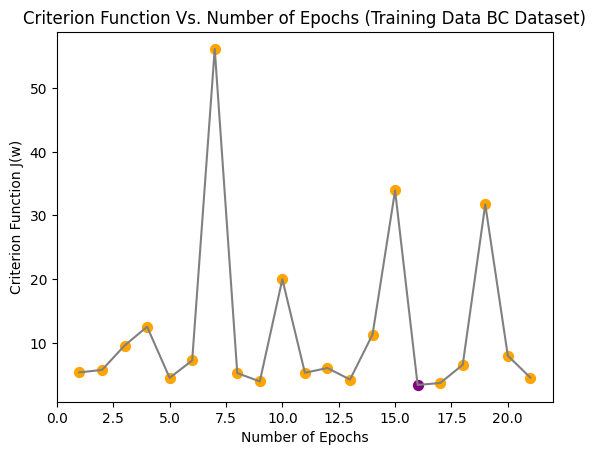

In [44]:
if n_epochs_bc <= 10:
    perceptron_bc.plotCriterionVsIters(n_iters=n_iters_arr_bc, J_History_iters=J_History_iterations_bc, J_optimum_iters=J_optimum_iterations_bc, datasetName="Training Data BC Dataset")

else:
    perceptron_bc.plotCriterionVsEpochs(n_epochs=n_epochs_arr_bc, J_History_epochs=J_History_epochs_bc, J_optimum_epochs=J_optimum_epochs_bc, datasetName="Training Data BC Dataset")


### ii] Plot of Classification Error Rate (CER) Vs. Number of Epochs (or) Plot of Classification Error Rate (CER) Vs. Number of Iterations

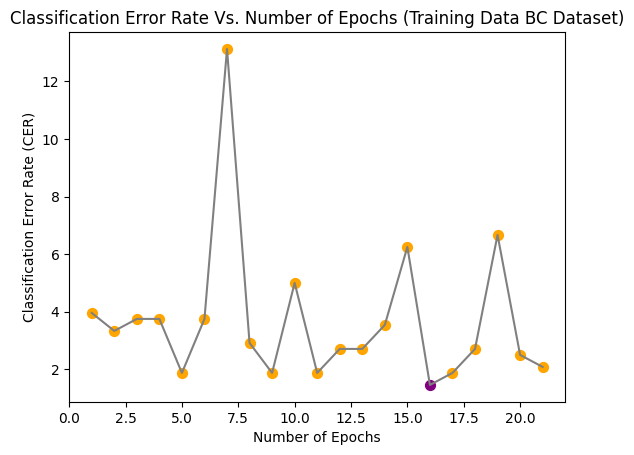

In [45]:
if n_epochs_bc <= 10:
    perceptron_bc.plotCERVsIters(n_iters=n_iters_arr_bc, cer_History_iters=cer_History_iterations_bc, cer_optimum_iters=cer_optimum_iterations_bc, datasetName="Training Data BC Dataset")

else:
    perceptron_bc.plotCERVsEpochs(n_epochs=n_epochs_arr_bc, cer_History_epochs=cer_History_epochs_bc, cer_optimum_epochs=cer_optimum_epochs_bc, datasetName="Training Data BC Dataset")


### iii] Run the perceptron classifier on the training set using the optimum w_vector . Give the classification error of each.


In [46]:
Y_hat_training_bc = perceptron_bc.predict(X=X_train_augmented_bc, w_optimum=w_optimum_epochs_bc)
cer_training_bc = perceptron_bc.calculateCER(T=T_train_changed_bc, Y_hat=Y_hat_training_bc, n=n_train_bc)
print(f"Classification Error Rate (CER) on the training data of BC Dataset is: {cer_training_bc}")

Classification Error Rate (CER) on the training data of BC Dataset is: 1.4583333333333333


### iii] Run the perceptron classifier on the test set using the optimum w_vector . Give the classification error of each.


In [47]:
n_test_bc, X_test_bc, T_test_bc = perceptron_bc.generateTestDataNumy(test_data=test_data_bc)

X_test_bc_normalized = 100 * X_test_bc / X_train_L1_norms

X_test_augmented_bc = perceptron_bc.augmentData(X=X_test_bc_normalized, n=n_test_bc)
print(f"Shape of Augmented X_test_bc: {X_test_augmented_bc.shape}")

T_test_changed_bc = perceptron_bc.changeLabels(T = T_test_bc)

Shape of Augmented X_test_bc: (89, 31)


In [48]:
Y_hat_test_bc = perceptron_bc.predict(X=X_test_augmented_bc, w_optimum=w_optimum_epochs_bc)
cer_test_bc = perceptron_bc.calculateCER(T=T_test_changed_bc, Y_hat=Y_hat_test_bc, n=n_test_bc)
print(f"Classification Error Rate (CER) on the test data of BC Dataset is: {cer_test_bc}")

Classification Error Rate (CER) on the test data of BC Dataset is: 3.3707865168539324


### 4. (d) iv] Is the 2-class data linearly separable? Answer yes, no, or don’t know. Briefly justify your answer.

### <strong> <em> We cannot explicitly comment whether the Breast Cancer Dataset is Linearly Separable or not solely based only on the Classification Error Rate or Cost Function J(w). The Classification Error Rate cannot determine if a given dataset is linearly separable or not. </strong></em>

### iv] Instead produce a histogram of the distance from the decision boundary ( g(x) / |𝑤|| ). On the same plot, produce a histogram of this quantity for all class 1 training data and another for all class 2 training data.

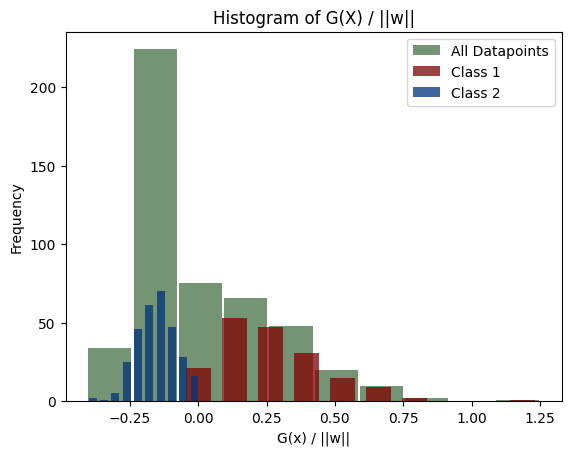

In [49]:
perceptron_bc.plotHistogram(X=X_train_augmented_bc, T=T_train_changed_bc, w_vector=w_optimum_epochs_bc, n_train=n_train_bc)

## 5. (c) Repeat problem 4(d) (i.e., the breast cancer data) using this Logistic regression and compare the results to that obtained with perceptron learning.

In [50]:
convergenceFlag_bc_sp, n_epochs_bc_sp, n_epochs_arr_bc_sp, n_iters_bc_sp, n_iters_arr_bc_sp, J_History_epochs_bc_sp, w_History_epochs_bc_sp, J_History_iterations_bc_sp, cer_History_epochs_bc_sp, cer_History_iterations_bc_sp = perceptron_bc.modelTrain_Stochastic_GD_softmaxPlus(
                                                                                                                                                                n_train = n_train_bc, 
                                                                                                                                                                X_train=X_train_shuffled_bc, 
                                                                                                                                                                T_train=T_train_shuffled_bc, 
                                                                                                                                                                w_vector=w_vector_bc, 
                                                                                                                                                                epochs=100, 
                                                                                                                                                                learn_rate=1)

Epoch #1 -> Cost J(W) is: 69.37074671047391 and CER using w_vector at the end of N iterations is 6.458333333333334
Epoch #2 -> Cost J(W) is: 54.40135759694145 and CER using w_vector at the end of N iterations is 3.958333333333333
Epoch #3 -> Cost J(W) is: 46.45151250585341 and CER using w_vector at the end of N iterations is 3.75
Epoch #4 -> Cost J(W) is: 47.64302711993713 and CER using w_vector at the end of N iterations is 3.958333333333333
Epoch #5 -> Cost J(W) is: 46.97369762390843 and CER using w_vector at the end of N iterations is 4.375
Epoch #6 -> Cost J(W) is: 38.52350071820304 and CER using w_vector at the end of N iterations is 2.2916666666666665
Epoch #7 -> Cost J(W) is: 48.03969526148232 and CER using w_vector at the end of N iterations is 4.375
Epoch #8 -> Cost J(W) is: 34.99018145326931 and CER using w_vector at the end of N iterations is 2.083333333333333
Epoch #9 -> Cost J(W) is: 34.2600454930948 and CER using w_vector at the end of N iterations is 2.2916666666666665
E

### i] Give the resulting optimum w vector; state whether the algorithm converged (i.1 reached) or halted without convergence (i.2 reached); and give the final criterion function value J(w_optimum)

In [51]:
optimum_index_epochs_bc_sp = np.argmin(J_History_epochs_bc_sp)
optimum_index_iterations_bc_sp = np.argmin(cer_History_iterations_bc_sp)

w_optimum_epochs_bc_sp = w_History_epochs_bc_sp[optimum_index_epochs_bc_sp]
J_optimum_epochs_bc_sp = J_History_epochs_bc_sp[optimum_index_epochs_bc_sp]
J_optimum_iterations_bc_sp = J_History_iterations_bc_sp[optimum_index_iterations_bc_sp]
cer_optimum_epochs_bc_sp = cer_History_epochs_bc_sp[optimum_index_epochs_bc_sp]
cer_optimum_iterations_bc_sp = cer_History_iterations_bc_sp[optimum_index_iterations_bc_sp]

In [52]:
if convergenceFlag_bc_sp:
    print(f"The Perceptron Learning Algorithm got converged after {n_iters_bc_sp} iterations and {n_epochs_bc_sp} epoch(s) for Training set of Breast Cancer Dataset!")
    print("DATA IS LINEARLY SEPARABLE!!")
else:
    print(f"The Perceptron Learning Algorithm did not converge for Training set of Breast Cancer Dataset and it took {n_iters_bc_sp} iterations and {n_epochs_bc_sp} epoch(s)!")

print(f"The optimum value of w_vector for Training Set of BC Dataset is: {w_optimum_epochs_bc_sp}")
print(f"The Final Criterion function value for optimum value of w is: {J_optimum_epochs_bc_sp}")

The Perceptron Learning Algorithm did not converge for Training set of Breast Cancer Dataset and it took 10000 iterations and 21 epoch(s)!
The optimum value of w_vector for Training Set of BC Dataset is: [[-16.94231011]
 [  0.79013394]
 [  7.8386996 ]
 [  0.96383928]
 [  5.50211223]
 [ -3.21443407]
 [ -1.69931979]
 [  9.11369127]
 [  7.75400914]
 [ -0.96907555]
 [ -4.32290443]
 [  3.94377556]
 [  0.77402057]
 [  1.52998166]
 [  9.62900231]
 [ -0.32254551]
 [ -5.7506678 ]
 [ -4.46659189]
 [ -3.20445861]
 [  0.85124785]
 [ -5.49695879]
 [  3.76785881]
 [ 10.97756808]
 [  3.64173845]
 [ 10.88281782]
 [  1.58718162]
 [  5.17991176]
 [  9.71639566]
 [  9.05889886]
 [  5.64200494]
 [  0.34079072]]
The Final Criterion function value for optimum value of w is: 26.926329761763704


### ii] Produce a learning curve, which is a plot of the values of the criterion function during the training process. If the training goes for more than 10 epochs, plot the criterion function vs. epochs. If training ends before 10 epochs, plot the criterion function vs. iterations.

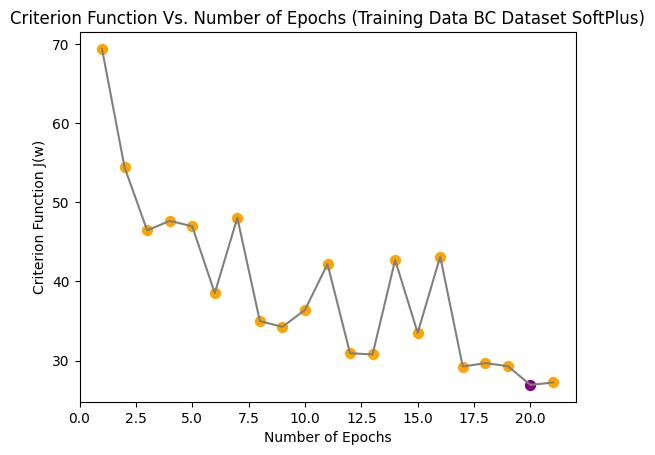

In [53]:
if n_epochs_bc_sp <= 10:
    perceptron_bc.plotCriterionVsIters(n_iters=n_iters_arr_bc_sp, J_History_iters=J_History_iterations_bc_sp, J_optimum_iters=J_optimum_iterations_bc_sp, datasetName="Training Data BC Dataset SoftPlus")

else:
    perceptron_bc.plotCriterionVsEpochs(n_epochs=n_epochs_arr_bc_sp, J_History_epochs=J_History_epochs_bc_sp, J_optimum_epochs=J_optimum_epochs_bc_sp, datasetName="Training Data BC Dataset SoftPlus")


### ii] Plot of Classification Error Rate (CER) Vs. Number of Epochs (or) Plot of Classification Error Rate (CER) Vs. Number of Iterations

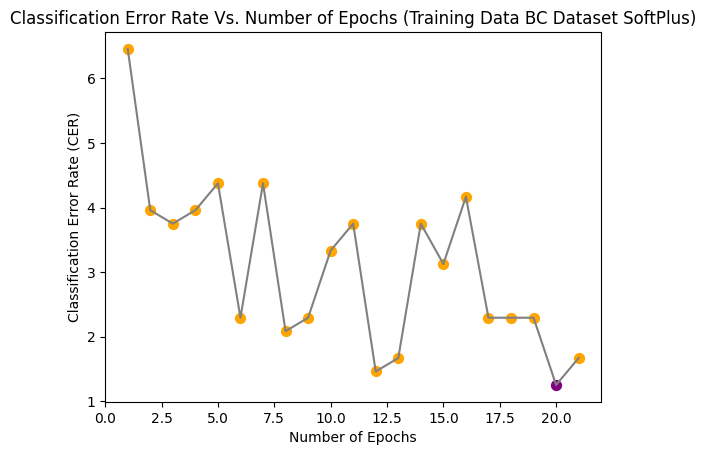

In [54]:
if n_epochs_bc_sp <= 10:
    perceptron_bc.plotCERVsIters(n_iters=n_iters_arr_bc_sp, cer_History_iters=cer_History_iterations_bc_sp, cer_optimum_iters=cer_optimum_iterations_bc_sp, datasetName="Training Data BC Dataset SoftPlus")

else:
    perceptron_bc.plotCERVsEpochs(n_epochs=n_epochs_arr_bc_sp, cer_History_epochs=cer_History_epochs_bc_sp, cer_optimum_epochs=cer_optimum_epochs_bc_sp, datasetName="Training Data BC Dataset SoftPlus")


### iii] Run the perceptron classifier on the training set using the optimum w_vector . Give the classification error of each.


In [55]:
Y_hat_training_bc_sp = perceptron_bc.predict(X=X_train_augmented_bc, w_optimum=w_optimum_epochs_bc_sp)
cer_training_bc_sp = perceptron_bc.calculateCER(T=T_train_changed_bc, Y_hat=Y_hat_training_bc_sp, n=n_train_bc)
print(f"Classification Error Rate (CER) on the training data of BC Dataset is: {cer_training_bc_sp}")

Classification Error Rate (CER) on the training data of BC Dataset is: 1.25


### iii] Run the perceptron classifier on the test set using the optimum w_vector . Give the classification error of each.

In [56]:
Y_hat_test_bc_sp = perceptron_bc.predict(X=X_test_augmented_bc, w_optimum=w_optimum_epochs_bc_sp)
cer_test_bc_sp = perceptron_bc.calculateCER(T=T_test_changed_bc, Y_hat=Y_hat_test_bc_sp, n=n_test_bc)
print(f"Classification Error Rate (CER) on the test data of BC Dataset is: {cer_test_bc_sp}")

Classification Error Rate (CER) on the test data of BC Dataset is: 3.3707865168539324


### Compare the results to that obtained with perceptron learning.
### <strong> <em> The Classification Error Rate for Perceptron Learning on the Training and Test set and the Classification Error rate on the Training and Test set is almost the same not major changes or improvements can be seen. But we can see the Cost Function J vs the # of epochs has become really smooth.</strong> </em>